## Importando Bibliotecas

In [1]:
import tensorflow as tf 
from tensorflow import keras
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Input, Dense
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
from keras.optimizers import Adam
from keras.models import Model
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from keras.utils import plot_model
import time


Using TensorFlow backend.


## Pre-processamento dos dados
**Carregando os dados de treino e teste:**

In [2]:
train_images = pd.read_csv('../fashion-mnist_train.csv')
test_images = pd.read_csv('../fashion-mnist_test.csv')

**Separando as labels do conjuntos:**

In [3]:
train_labels=train_images.loc[:, ['label']]
train_images=train_images.drop(['label'], axis=1)
test_labels=test_images.loc[:, ['label']]
test_images=test_images.drop(['label'], axis=1)

**Normalizando os data-sets:**

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0


----------------------
## Construção do modelo base
**Esta rede será utilizada posteriomente para comparações entre os modelos de dimensionalidade reduzida utilizando PCA e autoencoder.**

**Definição da estrutura do modelo por meio do Keras Sequential:**

In [5]:
model = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(784)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
Total params: 62,688
Trainable params: 62,688
Non-trainable params: 0
_________________________________________________________________


**Compilação do modelo:**

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Treino do modelo:**

In [7]:
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, shuffle=True)
end_time = time.time()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 93us/sample - loss: 0.5422 - accuracy: 0.8082 - val_loss: 0.4084 - val_accuracy: 0.8525
Epoch 2/10
48000/48000 [==============================] - 5s 114us/sample - loss: 0.3907 - accuracy: 0.8580 - val_loss: 0.3972 - val_accuracy: 0.8603
Epoch 3/10
48000/48000 [==============================] - 6s 115us/sample - loss: 0.3524 - accuracy: 0.8710 - val_loss: 0.3785 - val_accuracy: 0.8639
Epoch 4/10
48000/48000 [==============================] - 6s 128us/sample - loss: 0.3297 - accuracy: 0.8787 - val_loss: 0.3755 - val_accuracy: 0.8643
Epoch 5/10
48000/48000 [==============================] - 6s 117us/sample - loss: 0.3100 - accuracy: 0.8849 - val_loss: 0.3690 - val_accuracy: 0.8732
Epoch 6/10
48000/48000 [==============================] - 5s 115us/sample - loss: 0.2980 - accuracy: 0.8886 - val_loss: 0.3299 - val_accuracy: 0.8832
Epoch 7/10
48000/48000 [===========================

In [8]:
(end_time-start_time)/10

5.237707805633545

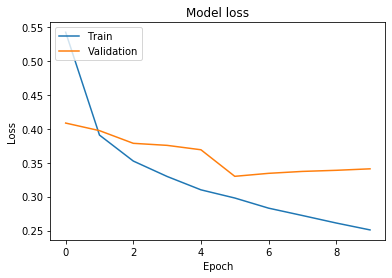

In [9]:
# Grafico para analise de custo do treino e da validacao
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Verificação dos resultados do modelo**

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.3244 - accuracy: 0.8870
Model - 3 layers - test loss: 32.44227240204811
Model - 3 layers - test accuracy: 88.7000024318695


-----------------------------
## Redução de Dimensionalidade Usando Principal component analysis (PCA)

**Pré-processamento de dados (Feature Scaling)**

In [11]:
scaler = StandardScaler()

#fit aplicado para apenas o conjunto de treino
scaler.fit(train_images)

#aplicacao da transformacao para ambos os conjuntos de treino e de test
train_images_r = scaler.transform(train_images)
test_images_r = scaler.transform(test_images)


**Definição do número de componentes:**

In [12]:
pca = PCA(n_components=3)

**Construção dos novos datasets de treino e de teste com dimensões reduzidas usando o PCA:**

In [13]:
pca.fit(train_images_r)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
train_images_r = pca.transform(train_images_r)
test_images_r = pca.transform(test_images_r)

**Preprocessamento: normalização e alteração do tipo dos dados de numpy array para pandas dataframe:**

In [15]:
#esse conjunto rr sera utilizado pela rede neural
train_images_rr = normalize(train_images_r)
test_images_rr = normalize(test_images_r)
train_images_rr = pd.DataFrame(data=train_images_rr)
test_images_rr = pd.DataFrame(data=test_images_rr)

#esse conjunto r sera utilizado posteriormente para a clusterizacao 
train_images_r = pd.DataFrame(data=train_images_r)
test_images_r= pd.DataFrame(data=test_images_r)

**Modelo Baseline que receberá os dados com dimensões reduzidas pelo PCA:**

In [16]:
model_r = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.softmax)
])

model_r.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
Total params: 12,704
Trainable params: 12,704
Non-trainable params: 0
_________________________________________________________________


**Compilação do modelo:**

In [17]:
model_r.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Treino do modelo:**

In [18]:
start_time = time.time()
history_r = model_r.fit(train_images_rr, train_labels, epochs=10, validation_split=0.2, shuffle=True)
end_time = time.time()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 55us/sample - loss: 1.1463 - accuracy: 0.5614 - val_loss: 1.0437 - val_accuracy: 0.5891
Epoch 2/10
48000/48000 [==============================] - 3s 63us/sample - loss: 1.0208 - accuracy: 0.5961 - val_loss: 1.0202 - val_accuracy: 0.5936
Epoch 3/10
48000/48000 [==============================] - 2s 49us/sample - loss: 1.0101 - accuracy: 0.5992 - val_loss: 1.0132 - val_accuracy: 0.6010
Epoch 4/10
48000/48000 [==============================] - 2s 51us/sample - loss: 1.0057 - accuracy: 0.5985 - val_loss: 1.0134 - val_accuracy: 0.5971
Epoch 5/10
48000/48000 [==============================] - 4s 73us/sample - loss: 1.0023 - accuracy: 0.6010 - val_loss: 1.0189 - val_accuracy: 0.5927
Epoch 6/10
48000/48000 [==============================] - 3s 53us/sample - loss: 1.0002 - accuracy: 0.6044 - val_loss: 1.0073 - val_accuracy: 0.5982
Epoch 7/10
48000/48000 [==============================] 

In [19]:
(end_time-start_time)/10

2.8046295642852783

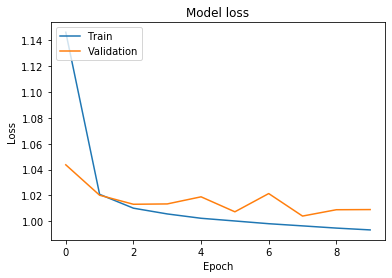

In [20]:
# Grafico para analise de custo do treino e da validacao
plt.plot(history_r.history['loss'])
plt.plot(history_r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Verificação dos resultados do modelo:**

In [21]:
test_loss, test_acc = model_r.evaluate(test_images_rr, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.9995 - accuracy: 0.5993
Model - 3 layers - test loss: 99.95107570648193
Model - 3 layers - test accuracy: 59.93000268936157


------------------------------------------------------

## Redução de Dimensionalidade Usando Autoencoders

**Instanciação da rede do autoencoder:**

In [46]:
#dimensao do output do processo de encoding, ou seja, dimensao apos compressao
encoding_dim = 2
#declaracao da imagen de input
input_img = Input(shape=(784,))
#representacao do input apos encoding
encoded = Dense(encoding_dim, activation='relu')(input_img)
#representacao da reconstrucao do input
decoded = Dense(784, activation='sigmoid')(encoded)

• Modelo do autoencoding

In [47]:
# modelo do input para sua a sua reconstrucao apos decoding
autoencoder = Model(input_img, decoded)

• Modelo do encoding

In [48]:
#modelo que mapeia o input relativo a sua reconstrucao apos encoding
encoder = Model(input_img, encoded)

In [49]:
#declaracao da o input comprimido
encoded_input = Input(shape=(encoding_dim,))
# recupera a ultima camada do modelo do autoencoder
decoder_layer = autoencoder.layers[-1]

• Modelo do decoding

In [50]:
decoder = Model(encoded_input, decoder_layer(encoded_input))

**Compilação do Modelo:**

In [51]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

**Treino do Autoencoder:**

In [ ]:
history_auto = autoencoder.fit(train_images, train_images,epochs=10,shuffle=True, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 127us/step - loss: 0.3756 - val_loss: 0.3761
Epoch 2/10
48000/48000 [==============================] - 6s 120us/step - loss: 0.3756 - val_loss: 0.3760
Epoch 3/10
48000/48000 [==============================] - 5s 113us/step - loss: 0.3755 - val_loss: 0.3761
Epoch 4/10
48000/48000 [==============================] - 6s 128us/step - loss: 0.3755 - val_loss: 0.3760
Epoch 5/10
48000/48000 [==============================] - 6s 115us/step - loss: 0.3754 - val_loss: 0.3760
Epoch 6/10
48000/48000 [==============================] - 6s 116us/step - loss: 0.3754 - val_loss: 0.3762
Epoch 7/10
33504/48000 [===================>..........] - ETA: 1s - loss: 0.3759

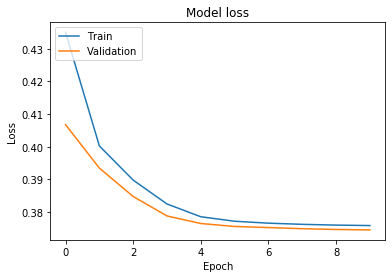

In [54]:
# Grafico para analise de custo do treino e da validacao
plt.plot(history_auto.history['loss'])
plt.plot(history_auto.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Utilização do encoding para a compressão das imagens do conjunto de treino e de test, e normalização para utilização posterior na rede neural.**

In [55]:
#compressao
encoded_train_images = encoder.predict(train_images)
encoded_test_images = encoder.predict(test_images)
#normalizacao
encoded_train_images = normalize(encoded_train_images)
encoded_test_images = normalize(encoded_test_images)

In [56]:
#transformacao de numpy array para pandas data frame
train_images_a = pd.DataFrame(data=encoded_train_images)
test_images_a =pd.DataFrame(data=encoded_test_images)

**Modelo Baseline que receberá os dados com dimensões reduzidas pelo PCA:**

In [57]:
model_a = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(2)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.softmax)
])

model_a.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                4128      
Total params: 12,640
Trainable params: 12,640
Non-trainable params: 0
_________________________________________________________________


**Compilação do modelo:**

In [58]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Treino do modelo:**

In [59]:
start_time = time.time()
history_a = model_a.fit(train_images_a, train_labels, epochs=10, validation_split=0.2, shuffle=True)
end_time = time.time()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 55us/sample - loss: 1.7593 - accuracy: 0.3285 - val_loss: 1.6416 - val_accuracy: 0.3621
Epoch 2/10
48000/48000 [==============================] - 3s 53us/sample - loss: 1.6349 - accuracy: 0.3761 - val_loss: 1.6243 - val_accuracy: 0.3739
Epoch 3/10
48000/48000 [==============================] - 3s 55us/sample - loss: 1.6202 - accuracy: 0.3797 - val_loss: 1.6117 - val_accuracy: 0.3805
Epoch 4/10
48000/48000 [==============================] - 3s 53us/sample - loss: 1.6123 - accuracy: 0.3839 - val_loss: 1.6077 - val_accuracy: 0.3754
Epoch 5/10
48000/48000 [==============================] - 3s 53us/sample - loss: 1.6067 - accuracy: 0.3844 - val_loss: 1.6007 - val_accuracy: 0.3898
Epoch 6/10
48000/48000 [==============================] - 3s 58us/sample - loss: 1.6061 - accuracy: 0.3866 - val_loss: 1.6035 - val_accuracy: 0.3887
Epoch 7/10
48000/48000 [==============================] 

In [60]:
((end_time-start_time)/10)

2.8082678079605103

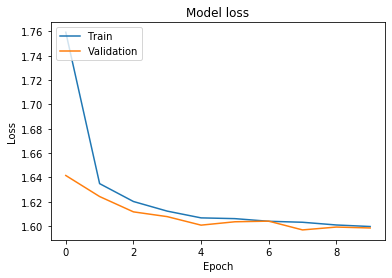

In [61]:
# Grafico para analise de custo do treino e da validacao
plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [62]:
test_loss, test_acc = model_a.evaluate(test_images_a, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 25us/sample - loss: 1.5903 - accuracy: 0.3907
Model - 3 layers - test loss: 159.02977607727053
Model - 3 layers - test accuracy: 39.07000124454498


------------------------------------------------------

## Clustering com K-means

**Optamos pela utilização das imagens reduzidas por meio do PCA, já que obtiveram por meio deste modelo os melhores resultados de predição na rede neural.**

In [63]:
train_images_k = train_images_r
test_images_k = test_images_r

**Construção do modelo do k-means com 10 clusters.**

In [64]:
kmean_model = KMeans(n_clusters=10, random_state=10)
y_km = kmean_model.fit(train_images_k)
labels = kmean_model.labels_

In [65]:
cluster_centroids = kmean_model.cluster_centers_

In [66]:
silhouette_score(X = train_images_k, labels = labels, random_state = 10)

0.3633611111619783

In [67]:
metrics.v_measure_score(train_labels.values.ravel(), labels, beta=1.0)

0.4455785750478227

---------------------------------
## Clustering com o DBScan
